**Data Pre-Processing**

In [1]:
import numpy as np # linear algebra
import math
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow_utils as tf_utils

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'gender_submission.csv']


In [2]:
#Test
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
answer = pd.read_csv("../input/gender_submission.csv")
#test.describe()
#train.describe()

In [3]:
# Check NA.
def na_table(data):
    null_val = data.isnull().sum()
    percent = 100* null_val/len(data)
    na = pd.concat([null_val, percent], axis=1)
    na_table =na.rename(columns={0:"number_of_NA", 1:"%"})
    
    return na_table

na_table(train)

,number_of_NA,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [4]:
#Pre_processing data
#in this section, we pre_process age data.

train["Age"] =train["Age"].fillna(train["Age"].median()) # exchange NA for Age's median
train["Embarked"] =train["Embarked"].fillna("S") #  exchange NA for S

#print(train["Age"])

In [5]:
# Next, comvert cadegorical data string to numeric.
import sys
#train["Sex"][train["Sex"]=="male"] =0 small error

train["Sex"]=train["Sex"].replace("male", 0)
train["Sex"]=train["Sex"].replace("female", 1)

train["Embarked"]=train["Embarked"].replace("S", 0)
train["Embarked"]=train["Embarked"].replace("C", 1)
train["Embarked"]=train["Embarked"].replace("Q", 2)

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,NaN,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,1


In [6]:
#Pre_processing test data
test["Age"] =test["Age"].fillna(test["Age"].median()) # exchange NA for Age's median
test["Fare"] =test["Fare"].fillna(test["Fare"].median()) # exchange NA for Age's median
test["Embarked"] =test["Embarked"].fillna("S") #  exchange NA for S

In [7]:
test["Sex"]=test["Sex"].replace("male", 0)
test["Sex"]=test["Sex"].replace("female", 1)

test["Embarked"]=test["Embarked"].replace("S", 0)
test["Embarked"]=test["Embarked"].replace("C", 1)
test["Embarked"]=test["Embarked"].replace("Q", 2)

na_table(test)

,number_of_NA,%
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000
Cabin,327,78.229665


**Bulid Neural Network**

make three layers neural network

In [8]:
#make dataset
X_train = train[["Pclass", "Sex","SibSp", "Parch" , "Age", "Fare"]].values.T
Y_train = train[["Survived"]].values.T
X_test = test[["Pclass", "Sex","SibSp", "Parch" , "Age", "Fare"]].values.T
Y_test = answer[["Survived"]].values.T

print(X_train.shape)
print(X_test.shape)

(6, 891)
(6, 418)


In [9]:
#Create Placeholders
def create_placeholders(n_x, n_y):
    #n_x = scalar, size of an vector(parameters)
    #n_y = number of class (0,1 -> 2)
    X=tf.placeholder(tf.float32, [n_x, None], name="X")
    Y=tf.placeholder(tf.float32, [n_y, None], name="Y")
    
    return X, Y

#test
#X,Y = create_placeholders(6,2)
#print(str(X))

In [10]:
#Initializing the parameters
def initialize_parameters():
    tf.set_random_seed(1)
    
    W1 = tf.get_variable("W1", [16, 6], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1", [16, 1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [8, 16], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2", [8, 1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [1, 8], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3", [1, 1], initializer = tf.zeros_initializer())
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    return parameters

In [11]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(16, 6) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(16, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(8, 16) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(8, 1) dtype=float32_ref>


In [12]:
#forward_propagation
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                     # Z3 = np.dot(W3,Z2) + b3
    
    return Z3

In [13]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(6, 891)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(1, ?), dtype=float32)


In [14]:
#compute cost
def compute_cost(Z3, Y):
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=labels))
    
    return cost

In [15]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(6, 1)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [16]:
#make functions random_mini_batchs, convert_to_one_hot
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if dead, 1 if survive).
    mini_batch_size - size of the mini-batches, integer
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [17]:
# Building model
def model(X_train, Y_train, X_test, Y_test, learning_rate=0.001, num_epochs=1000, minibatch_size=32, print_cost=True):
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 2                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    X, Y = create_placeholders(n_x, n_y)
    # Initialize parameters
    parameters = initialize_parameters()
    # Forward propagation: Build the forward propagation in the tensorflow graph
    Z3 = forward_propagation(X, parameters)
    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(Z3, Y)
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    # Initialize all the variables
    init = tf.global_variables_initializer()
    
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Cost after epoch 0: 0.779831
Cost after epoch 100: 0.431599
Cost after epoch 200: 0.421119
Cost after epoch 300: 0.413348
Cost after epoch 400: 0.423668
Cost after epoch 500: 0.416877
Cost after epoch 600: 0.406871
Cost after epoch 700: 0.409410
Cost after epoch 800: 0.404239
Cost after epoch 900: 0.402910


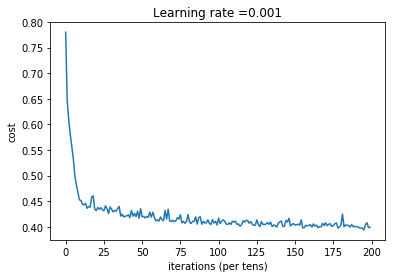

Parameters have been trained!
Train Accuracy: 1.0
Test Accuracy: 1.0


In [18]:
parameters = model(X_train, Y_train, X_test, Y_test)

In [19]:
def predict(X, parameters):
    W1=tf.convert_to_tensor(parameters["W1"])
    b1=tf.convert_to_tensor(parameters["b1"])
    W2=tf.convert_to_tensor(parameters["W2"])
    b2=tf.convert_to_tensor(parameters["b2"])
    W3=tf.convert_to_tensor(parameters["W3"])
    b3=tf.convert_to_tensor(parameters["b3"])
    #W4=tf.convert_to_tensor(parameters["W4"])
    #b4=tf.convert_to_tensor(parameters["b4"])
    
    params={
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2,
        "W3":W3,
        "b3":b3,
       # "W4":W4,
        #"b4":b4
    }
    
    n_x = X.shape[0]
    x=tf.placeholder("float", [n_x, None])
    
    #Z4=forward_propagation(x, parameters)
    Z3=forward_propagation(x, parameters)
    #p = tf.cast(tf.greater(tf.sigmoid(Z4), 0.5), tf.float32)
    p=tf.round(tf.sigmoid(Z3))
    
    with tf.Session() as sess:
        prediction = sess.run(p, feed_dict={x:X})
        
    return prediction

In [20]:
#Get passengerID
PassengerID = np.array(test["PassengerId"]).astype(int)

#GET prediction
pred=predict(X_test, parameters).T.astype(int)

#merge ID and prediction
output = pd.DataFrame(pred, PassengerID, columns=["Survived"])
#write csv
output.to_csv("output.csv", index_label=["PassengerID"])